In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D

In [6]:
spot = pd.read_csv("C:\\Users\\franc\\IH-Lab\\lab-api-wrappers\\df_song_features.csv").drop('Unnamed: 0', axis =1) #Try my own list before the Kaggle joint

In [7]:
#get only numericals for k-means
spot_num =  spot.select_dtypes(np.number)

In [8]:
spot_num

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,9,0.390,0.06920,0,-23.312,1,0.0905,0.4350,0.504000,0.0822,0.0433,76.465,740413,4
1,34,0.283,0.00966,0,-28.107,1,0.0327,0.9930,0.807000,0.0884,0.1080,103.468,259042,5
2,31,0.694,0.76100,5,-4.087,0,0.0372,0.4460,0.000000,0.2890,0.5500,114.947,208467,4
3,34,0.487,0.75000,0,-8.348,1,0.0516,0.0582,0.000008,0.2830,0.8230,127.769,138688,4
4,21,0.646,0.27900,4,-3.575,1,0.0545,0.1490,0.915000,0.0993,0.7150,120.063,147587,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,31,0.571,0.75000,7,-5.987,0,0.0307,0.4190,0.000000,0.1040,0.5630,87.982,242867,4
5883,26,0.602,0.79500,2,-4.828,1,0.1110,0.0458,0.000000,0.1660,0.8580,127.993,149381,5
5884,2,0.866,0.69500,8,-7.347,1,0.0357,0.3350,0.884000,0.1260,0.8990,117.031,211160,4
5885,52,0.523,0.39100,4,-11.769,0,0.0300,0.4370,0.492000,0.2050,0.0378,109.952,169038,4


In [214]:
spot_num.isna().sum()

popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [9]:
sport_num = spot_num.dropna(inplace=True)

C:\Users\franc\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
#normalizing features
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(spot_num)

In [217]:
pd.DataFrame(X_prep,columns=spot_num.columns).head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.695454,-0.831147,-2.014801,-1.503963,-2.388926,0.764629,0.039203,0.239505,0.790239,-0.680727,-1.617392,-1.496578,4.282316,0.248575
1,-0.020497,-1.390822,-2.237144,-1.503963,-3.210491,0.764629,-0.499914,1.823920,1.645358,-0.639845,-1.381506,-0.592804,0.084366,2.553082
2,-0.221492,0.758957,0.568621,-0.095149,0.905044,-1.307825,-0.457941,0.270739,-0.632136,0.682897,0.229951,-0.208609,-0.356689,0.248575
3,-0.020497,-0.323778,0.527544,-1.503963,0.174973,0.764629,-0.323629,-0.830401,-0.632114,0.643334,1.225263,0.220535,-0.965219,0.248575
4,-0.891475,0.507888,-1.231335,-0.376912,0.992769,0.764629,-0.296579,-0.572578,1.950153,-0.567971,0.831513,-0.037380,-0.887612,0.248575


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X_prep)

KMeans(n_clusters=9, random_state=0)

In [21]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     251
1    1124
2     508
3     848
4     825
5     313
6    1275
7      59
8     684
dtype: int64

In [22]:
clusters

array([2, 2, 1, ..., 6, 4, 6])

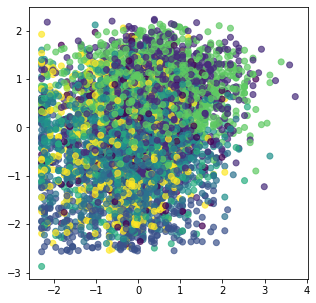

In [23]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.7)
plt.show()

In [296]:
#Checking K-mean inertia 

In [297]:
kmeans.inertia_ 

46949.675200271406

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

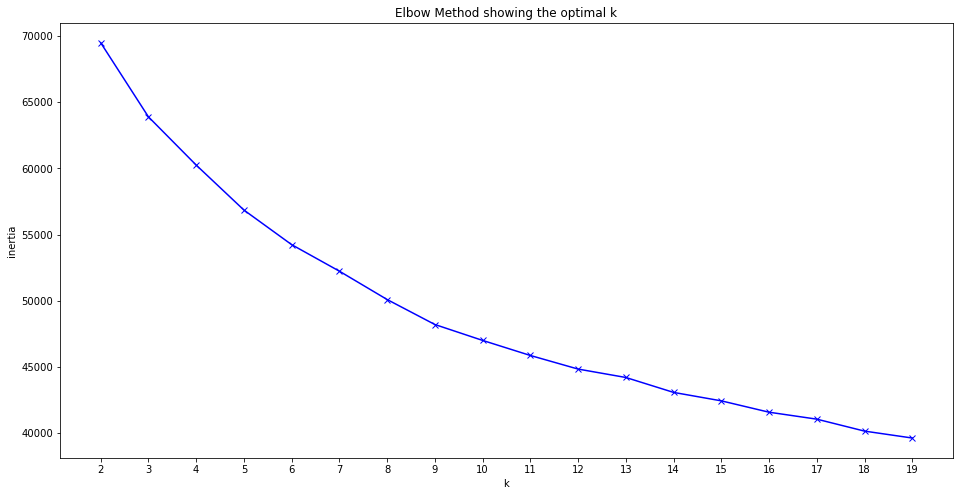

In [298]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [172]:
#Checking K-mean silhouette

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

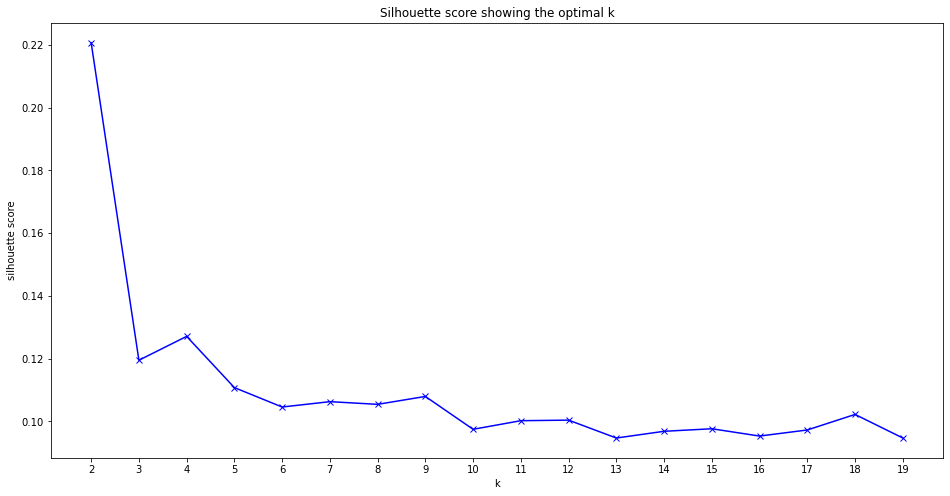

In [173]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

### ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=9,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

### complete linkage penalizes heavily outliers
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

### different algorithms are good for different applications
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='average')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

#from matplotlib.lines import Line2D
#from sklearn.metrics import silhouette_score

### different algorithms are good for different applications - kmeans and single agglomerative have so far shown very different results

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X_prep)
y1_pred = kmeans.predict(X_prep)


single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X_prep)


options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X_prep[:, 0], X_prep[:, 1], color=colors[y1_pred])
charts[1].scatter(X_prep[:, 0], X_prep[:, 1], color=colors[y2_pred])
plt.show()

In [ ]:
#Trying the PCA method to improve the model

X = spot_num

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=59
)

scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#same thing in 1 line
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sb

pca = PCA()
pca.fit(X_train_scaled)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

###Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

pca = PCA(10)
pca.fit(X_train_scaled)

pca.explained_variance_ratio_

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

y_pred_pca = knn.predict(X_test_pca)

###with PCA
confusion_matrix(y_test, y_pred_pca)

np.array(X_train)[:,1]

plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c = y_train)

corr = pd.DataFrame(X_train_scaled).corr()
sb.heatmap(corr, 
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)
plt.title('Correlation of in original data')

X_train_pca = pca.transform(X_train_scaled)
corr_pc = pd.DataFrame(X_train_pca).corr()
sb.heatmap(corr_pc, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Correlation of PC scores')

In [38]:
#Apply PCA method to the whole dataframe

In [39]:
scaler = StandardScaler()
scaler.fit(spot_num)
spot_num_scaled = scaler.transform(spot_num)

In [50]:
pca = PCA()
pca.fit(spot_num_scaled)

PCA()

In [51]:
exp_var_pca = pca.explained_variance_ratio_

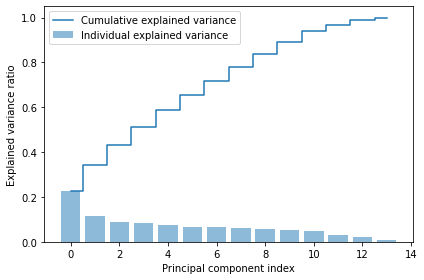

In [52]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [55]:
pca = PCA(0.80)
pca.fit(spot_num_scaled)

PCA(n_components=0.8)

In [59]:
np.array(spot_num_scaled)[:,1]

array([-0.8311471 , -1.39082193,  0.7589571 , ...,  1.65862131,
       -0.13547651,  0.99433436])

In [56]:
spot_num_scaled_pca = pca.transform(spot_num_scaled)

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X_prep)

# Predicting / assigning the clusters:
clusters = kmeans.predict(spot_num_scaled_pca)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

clusters

plt.figure(figsize=(5, 5))
plt.scatter(spot_num_scaled_pca[:, 0], spot_num_scaled_pca[:, 1], c=clusters,alpha=0.7)
plt.show()

NameError: name 'n_components' is not defined

In [44]:
plt.scatter(spot_num_scaled[:,0],spot_num_scaled[:,1], c = y)

NameError: name 'y' is not defined

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X_prep)

# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

clusters

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=clusters,alpha=0.7)
plt.show()